In [26]:
import dis
import timeit
import sys
import importlib
import subprocess
import collections
import numpy as np

In [2]:
if importlib.util.find_spec("matplotlib"):
    import matplotlib.pyplot as plt
else:
    try:
        subprocess.run([sys.executable,"-m","pip","install","matplotlib"])
        import matplotlib.pyplot as plt
    except subprocess.CalledProcessError:
        print("Please install manually")

  Using cached matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
Using cached matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)


In [3]:
def f1(times):
    import pathlib
    for _ in range(times):
        _ = pathlib.Path("")

def f2(times):
    from pathlib import Path
    for _ in range(times):
        _ = Path("")

In [4]:
setup_code = """
from __main__ import f1
"""
code_to_time = """
f1(10_000_000)
"""
execution_time = timeit.timeit(stmt=code_to_time,setup=setup_code,number=1)
execution_time

6.078258081999593

In [5]:
execution_time = timeit.timeit("f1(10_000_000)",globals=globals(),number=1)
execution_time

6.2021419319989946

In [6]:
setup_code = """
from __main__ import f2
"""
code_to_time = """
f2(10_000_000)
"""
execution_time = timeit.timeit(stmt=code_to_time,setup=setup_code,number=1)
execution_time

5.892960495000807

In [7]:
execution_time = timeit.timeit("f2(10_000_000)",globals=globals(),number=1)
execution_time

5.770854760001384

In [8]:
dis.dis(f1)

  2           0 LOAD_CONST               1 (0)
              2 LOAD_CONST               0 (None)
              4 IMPORT_NAME              0 (pathlib)
              6 STORE_FAST               1 (pathlib)

  3           8 LOAD_GLOBAL              1 (range)
             10 LOAD_FAST                0 (times)
             12 CALL_FUNCTION            1
             14 GET_ITER
        >>   16 FOR_ITER                 7 (to 32)
             18 STORE_FAST               2 (_)

  4          20 LOAD_FAST                1 (pathlib)
             22 LOAD_METHOD              2 (Path)
             24 LOAD_CONST               2 ('')
             26 CALL_METHOD              1
             28 STORE_FAST               2 (_)
             30 JUMP_ABSOLUTE            8 (to 16)

  3     >>   32 LOAD_CONST               0 (None)
             34 RETURN_VALUE


In [9]:
dis.dis(f2)

  7           0 LOAD_CONST               1 (0)
              2 LOAD_CONST               2 (('Path',))
              4 IMPORT_NAME              0 (pathlib)
              6 IMPORT_FROM              1 (Path)
              8 STORE_FAST               1 (Path)
             10 POP_TOP

  8          12 LOAD_GLOBAL              2 (range)
             14 LOAD_FAST                0 (times)
             16 CALL_FUNCTION            1
             18 GET_ITER
        >>   20 FOR_ITER                 6 (to 34)
             22 STORE_FAST               2 (_)

  9          24 LOAD_FAST                1 (Path)
             26 LOAD_CONST               3 ('')
             28 CALL_FUNCTION            1
             30 STORE_FAST               2 (_)
             32 JUMP_ABSOLUTE           10 (to 20)

  8     >>   34 LOAD_CONST               0 (None)
             36 RETURN_VALUE


In [10]:
setup_code = """
from __main__ import f1
"""
code_to_time = """
f1(10_000)
"""
execution_time = timeit.timeit(stmt=code_to_time,setup=setup_code,number=1)
execution_time

0.006184060001032776

In [11]:
execution_time = timeit.timeit("f1(10_000)",globals=globals(),number=1)
execution_time

0.0062321900004462805

In [12]:
setup_code = """
from __main__ import f2
"""
code_to_time = """
f2(10_000)
"""
execution_time = timeit.timeit(stmt=code_to_time,setup=setup_code,number=1)
execution_time

0.0059319520005374216

In [13]:
execution_time = timeit.timeit("f2(10_000)",globals=globals(),number=1)
execution_time

0.006470928999988246

In [14]:
%%timeit -n 1 -r 1
f1(10)

26 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [15]:
%%timeit -n 1 -r 1
f2(10)

24.1 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [16]:
with np.printoptions(suppress=True):
    print(np.logspace(0,5,6))

[     1.     10.    100.   1000.  10000. 100000.]


In [25]:
time_dict = collections.defaultdict(list)
params = np.logspace(0,7,8,dtype=int)
funcs = [f1,f2]


for func in funcs:
    for p in params:
        time_dict[func.__qualname__].append(np.mean(timeit.repeat(f"{func.__qualname__}({p})",globals=globals(),number=1,repeat=7)))


In [27]:
time_dict

defaultdict(list,
            {'f1': [2.7041431686874214e-06,
              8.031571269384585e-06,
              5.7908428841203984e-05,
              0.00058012471397108,
              0.005996122857011089,
              0.06197035742895553,
              0.6210901220004287,
              6.147757106285748],
             'f2': [2.166142491790067e-06,
              7.3880000854842365e-06,
              6.262128616591716e-05,
              0.0006152258566934117,
              0.005994997000016156,
              0.06064950742776481,
              0.5974411302860452,
              5.834071180714351]})

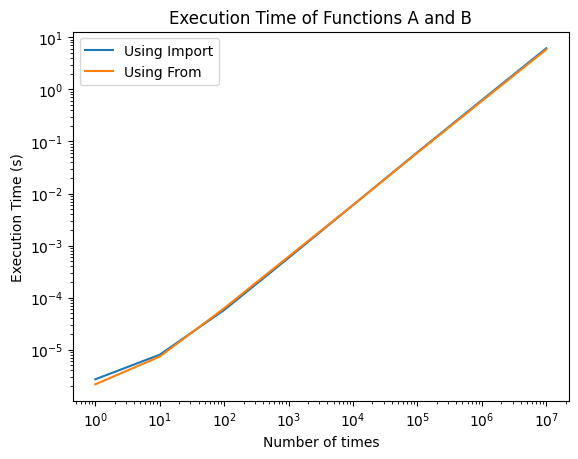

In [33]:

plt.plot(params, time_dict[f1.__qualname__], label='Using Import')
plt.plot(params, time_dict[f2.__qualname__], label='Using From')
plt.xlabel('Number of times')
plt.ylabel('Execution Time (s)')
plt.xscale("log")
plt.yscale("log")
plt.title('Execution Time of Functions A and B')
plt.legend()
plt.show()